# Course Name: Visualisation for Data Analytics
# Objective: Time Series Analysis

##  Load the data 'monthly_milk_production.csv' and print the basic information? This ataset containing monthly milk production values in pounds per cow from January 1962 to December 1975.


In [ ]:
import pandas as pd
milk = pd.read_csv("monthly_milk_production.csv")


In [ ]:
milk.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
milk.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


## Q1. What is the current data type of the Date column?

In [ ]:
print(milk.dtypes['Date'])

object


## Q2. Change the Date column to a datetime format

In [ ]:
milk['Date'] = pd.to_datetime(milk.Date)


In [ ]:
milk.head()

,Date,Production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [ ]:
print(milk.dtypes['Date'])

datetime64[ns]


## Q3. Set the Date column to be the new index

In [ ]:
milk.set_index('Date', inplace=True)

In [ ]:
milk.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


## Q4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

<AxesSubplot:xlabel='Date'>

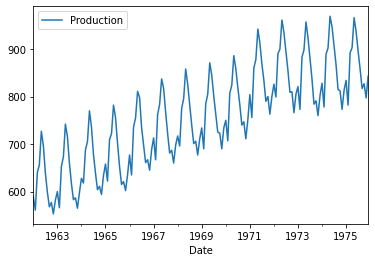

In [ ]:
milk.plot.line()

## Q5. Add a column called 'Month' that takes the month value from the index


In [ ]:
milk['month'] = pd.DatetimeIndex(milk.reset_index()['Date']).month
#Lector's method
#df['Month']=df.index.month 


In [ ]:
milk

,Production,month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5
...,...,...
1975-08-01,858,8
1975-09-01,817,9
1975-10-01,827,10


## Q6. Create a BoxPlot that groups by the Month field

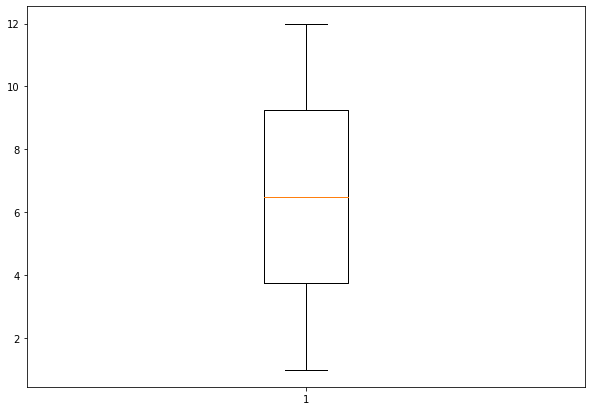

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(milk.month)
 
# show plot
plt.show()

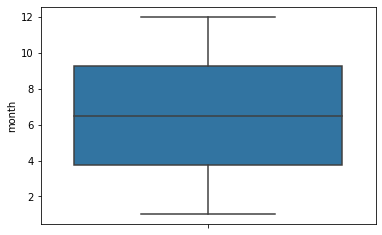

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot( y=milk["month"] );
plt.show()

In [ ]:
#Lector's method
#df.boxplot(by='Month',figsize=(12,5));


## Q7. Read the data set UMTMVS.CSV and print the basic information. Set the DATE column as the index and Convert the index to be a datetime index. Read information about the dataset here: https://fred.stlouisfed.org/series/UMTMVS

In [ ]:
df = pd.read_csv("UMTMVS.CSV")

In [ ]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [ ]:
df.describe()

,UMTMVS
count,325.000000
mean,381957.273846
std,80728.270329
min,209438.000000
25%,319275.000000
50%,377093.000000
75%,454967.000000
max,529157.000000


In [ ]:
df['DATE'] = pd.to_datetime(df.DATE)


In [ ]:
df.set_index('DATE', inplace=True)

In [ ]:
df

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0
...,...
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0


## Q8.Plot out the data, choose a reasonable figure size.

<AxesSubplot:xlabel='DATE'>

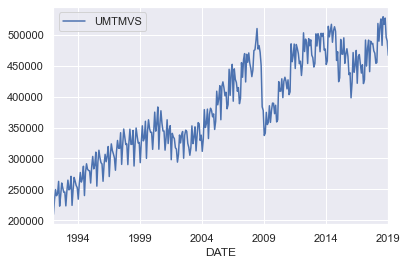

In [ ]:
df.plot.line()
#df.plot(figsize=(14,8))

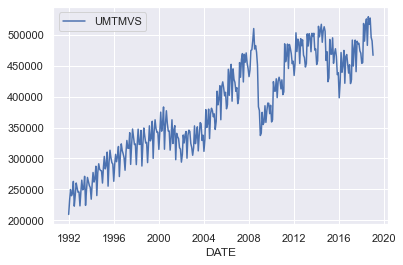

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(data=df)
plt.show()

## Q9. What was the percent increase in value from Jan 2009 to Jan 2019?

In [ ]:
((df.loc['2019-01-01'].values[0] - df.loc['2009-01-01'].values[0])/(df.loc['2019-01-01'].values[0]))*100
#100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']



27.78331201758389

## Q10. What was the percent decrease from Jan 2008 to Jan 2009?

In [ ]:
((df.loc['2008-01-01'].values[0] - df.loc['2009-01-01'].values[0])/(df.loc['2008-01-01'].values[0]))*100
#100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']



22.022775481313047

## Q11. How many millions of dollars in value was lost in 2008? 

In [ ]:
df.loc['2019-01-01'].values[0] - df.loc['2009-01-01'].values[0]
#df.loc['2008-01-01'] - df.loc['2009-01-01']


129690.0

## Q12.Create a bar plot showing the average value in millions of dollars per year?

<AxesSubplot:xlabel='year'>

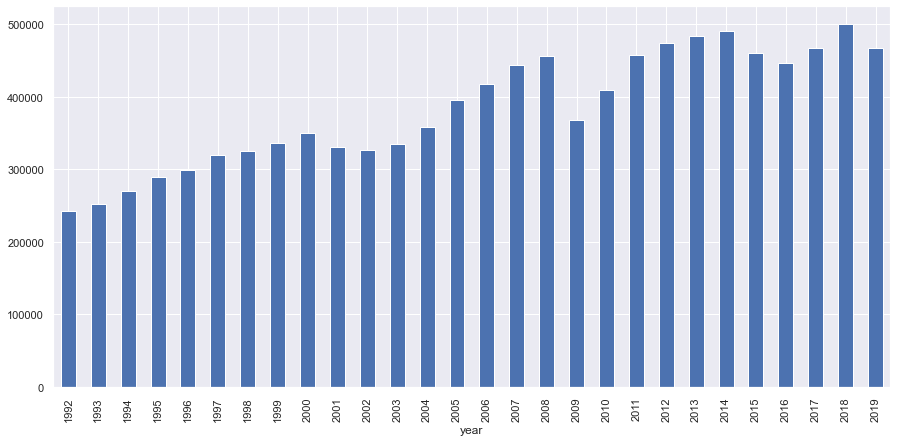

In [ ]:
df['year'] = pd.DatetimeIndex(df.reset_index()['DATE']).year
x=df.groupby('year')['UMTMVS'].mean()
plt.figure(figsize =(15, 7))
x.plot.bar()
#df.resample('Y').mean().plot.bar(figsize=(15,8))


<AxesSubplot:xlabel='year', ylabel='UMTMVS'>

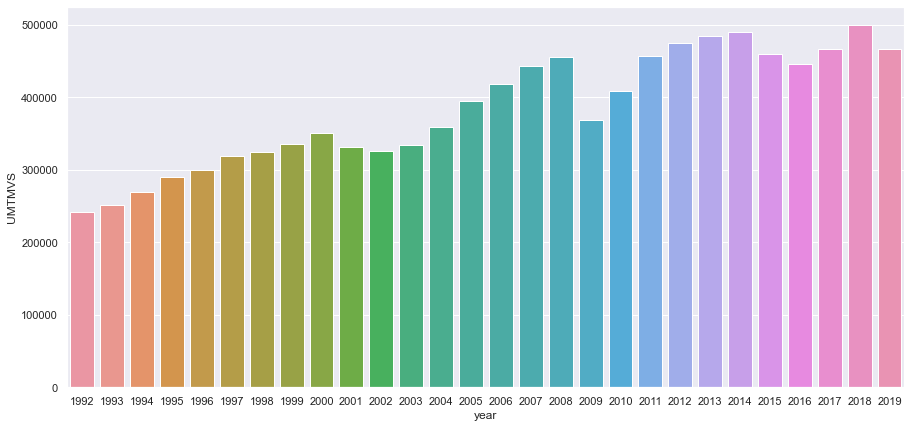

In [ ]:
plt.figure(figsize =(15, 7))
sns.barplot(x=df.year,y=df.groupby(df.year)['UMTMVS'].transform('mean'),data=df)